In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
train_path=r"D:/AnacondaProjects/tez/tensorflow/workspace/training/imgs/train"
test_path=r"D:/AnacondaProjects/tez/tensorflow/workspace/training/imgs/test"
val_path=r"D:/AnacondaProjects/tez/tensorflow/workspace/training/imgs/val"

In [4]:
print(train_path)

D:/AnacondaProjects/tez/tensorflow/workspace/training/imgs/train


In [5]:
x_train = []

for folder in os.listdir(train_path): # train_path'teki klasorleri doner
    
    sub_path=train_path+"/"+folder
    
    for img in os.listdir(sub_path): # train_path icindeki klasorlerin icindeki resimleri doner
        
        image_path=sub_path+"/"+img
        
        img_arr=cv2.imread(image_path)
        
        img_arr=cv2.resize(img_arr,(224,224))
        
        x_train.append(img_arr)

In [6]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

In [7]:
x_val = []

for folder in os.listdir(val_path):
    
    sub_path=train_path+"/"+folder
    
    for img in os.listdir(sub_path):
        
        image_path=sub_path+"/"+img
        
        img_arr=cv2.imread(image_path)
        
        img_arr=cv2.resize(img_arr,(224,224))
        
        x_val.append(img_arr)

In [8]:
type(x_train)

list

In [9]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [10]:
type(train_x)

numpy.ndarray

In [11]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [12]:
type(train_x)

numpy.ndarray

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   #horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'sparse')

Found 465 images belonging to 23 classes.
Found 92 images belonging to 23 classes.
Found 92 images belonging to 23 classes.


In [15]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [16]:
training_set.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'R': 16,
 'S': 17,
 'T': 18,
 'U': 19,
 'V': 20,
 'Y': 21,
 'Z': 22}

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = keras.Sequential()

model.add(keras.Input(shape=(224,224,3)))

model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(23, activation='softmax')) #output layer

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [19]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [21]:
train_x.shape

(465, 224, 224, 3)

In [22]:
train_y.shape

(465,)

In [23]:
history = model.fit(train_x,train_y,
                    epochs=10,
                    callbacks=[early_stop],
                    batch_size=10, 
                    shuffle=True)

Epoch 1/10
47/47 [==============================] - 27s 218ms/step - loss: 3.1923 - accuracy: 0.1183
Epoch 2/10
47/47 [==============================] - 9s 191ms/step - loss: 1.6075 - accuracy: 0.5183
Epoch 3/10
47/47 [==============================] - 9s 191ms/step - loss: 0.9753 - accuracy: 0.6860
Epoch 4/10
47/47 [==============================] - 9s 191ms/step - loss: 0.5530 - accuracy: 0.8022
Epoch 5/10
47/47 [==============================] - 9s 190ms/step - loss: 0.4372 - accuracy: 0.8624
Epoch 6/10
47/47 [==============================] - 9s 192ms/step - loss: 0.3623 - accuracy: 0.8839
Epoch 7/10
47/47 [==============================] - 9s 190ms/step - loss: 0.2478 - accuracy: 0.9226
Epoch 8/10
47/47 [==============================] - 9s 192ms/step - loss: 0.1946 - accuracy: 0.9376
Epoch 9/10
47/47 [==============================] - 9s 190ms/step - loss: 0.1371 - accuracy: 0.9570
Epoch 10/10
47/47 [==============================] - 9s 191ms/step - loss: 0.1207 - accuracy: 0.963

In [24]:
model.save('D:\\AnacondaProjects\\tez\\Tensorflow\\workspace\\training\\imgs\\model.h5')

In [25]:
model.evaluate(test_x,test_y,batch_size=16)

6/6 [==============================] - 2s 213ms/step - loss: 2.2200 - accuracy: 0.7500


[2.2200167179107666, 0.75]

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [27]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

In [28]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5
           3       0.75      0.50      0.60         6
           4       0.25      1.00      0.40         1
           5       1.00      0.80      0.89         5
           6       1.00      0.80      0.89         5
           7       0.00      0.00      0.00         0
           8       0.25      1.00      0.40         1
           9       0.75      1.00      0.86         3
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         4
          12       0.75      1.00      0.86         3
          13       1.00      1.00      1.00         4
          14       1.00      0.57      0.73         7
          15       1.00      0.50      0.67         8
          16       1.00      0.80      0.89         5
          17       0.50    

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 3 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 3 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 

In [30]:
type(confusion_matrix)

function

In [31]:
cf_matrix = np.array(confusion_matrix(y_pred,test_y))

<AxesSubplot:>

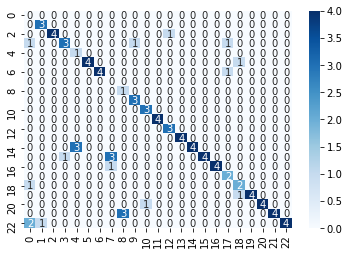

In [33]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, cmap='Blues')